In [1]:
# Function to extract the block index from the block ID string
def extract_block_index(block_id):
    return int(block_id.split('_')[-1])

# Test the function
sample_block_ids = ["1_2_12", "1_2_123", "1_2_1234"]
block_indexes = [extract_block_index(id) for id in sample_block_ids]
block_indexes

[12, 123, 1234]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_block_index(block_id):
    return int(block_id.split('_')[-1])
    
def create_latency_plots(df, window_size=20, marker_size=50):
    # Calculate the rolling average for each unique path (combination of Source and Destination)
    df['Path'] = df['Source'].astype(str) + ' -> ' + df['Destination'].astype(str)
    df['Latency_Rolling_Avg'] = df.groupby('Path')['Latency'].transform(lambda x: x.rolling(window=window_size).mean())
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # Plot 1: Latency vs Time (Rolling Average)
    sns.lineplot(x='Arrival Time', y='Latency_Rolling_Avg', hue='Path', ax=axes[0, 0], data=df)
    axes[0, 0].set_title(f'Latency Trends Over Time (Window Size = {window_size})')
    axes[0, 0].set_xlabel('Arrival Time')
    axes[0, 0].set_ylabel('Latency (Rolling Average)')
    
    # Plot 2: Latency vs Data Block Index (Rolling Average)
    sns.lineplot(x='Block Index', y='Latency_Rolling_Avg', hue='Path', ax=axes[0, 1], data=df)
    axes[0, 1].set_title(f'Latency Across Data Blocks (Window Size = {window_size})')
    axes[0, 1].set_xlabel('Data Block Index')
    axes[0, 1].set_ylabel('Latency (Rolling Average)')
    
    # Scatter Plot 1: Latency vs Time
    sns.scatterplot(x='Arrival Time', y='Latency', hue='Path', ax=axes[1, 0], data=df, marker='o', s=marker_size)
    axes[1, 0].set_title('Individual Latency Points Over Time')
    axes[1, 0].set_xlabel('Arrival Time')
    axes[1, 0].set_ylabel('Latency')
    
    # Scatter Plot 2: Latency vs Data Block Index
    sns.scatterplot(x='Block Index', y='Latency', hue='Path', ax=axes[1, 1], data=df, marker='o', s=marker_size)
    axes[1, 1].set_title('Individual Latency Points Across Data Blocks')
    axes[1, 1].set_xlabel('Data Block Index')
    axes[1, 1].set_ylabel('Latency')
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()


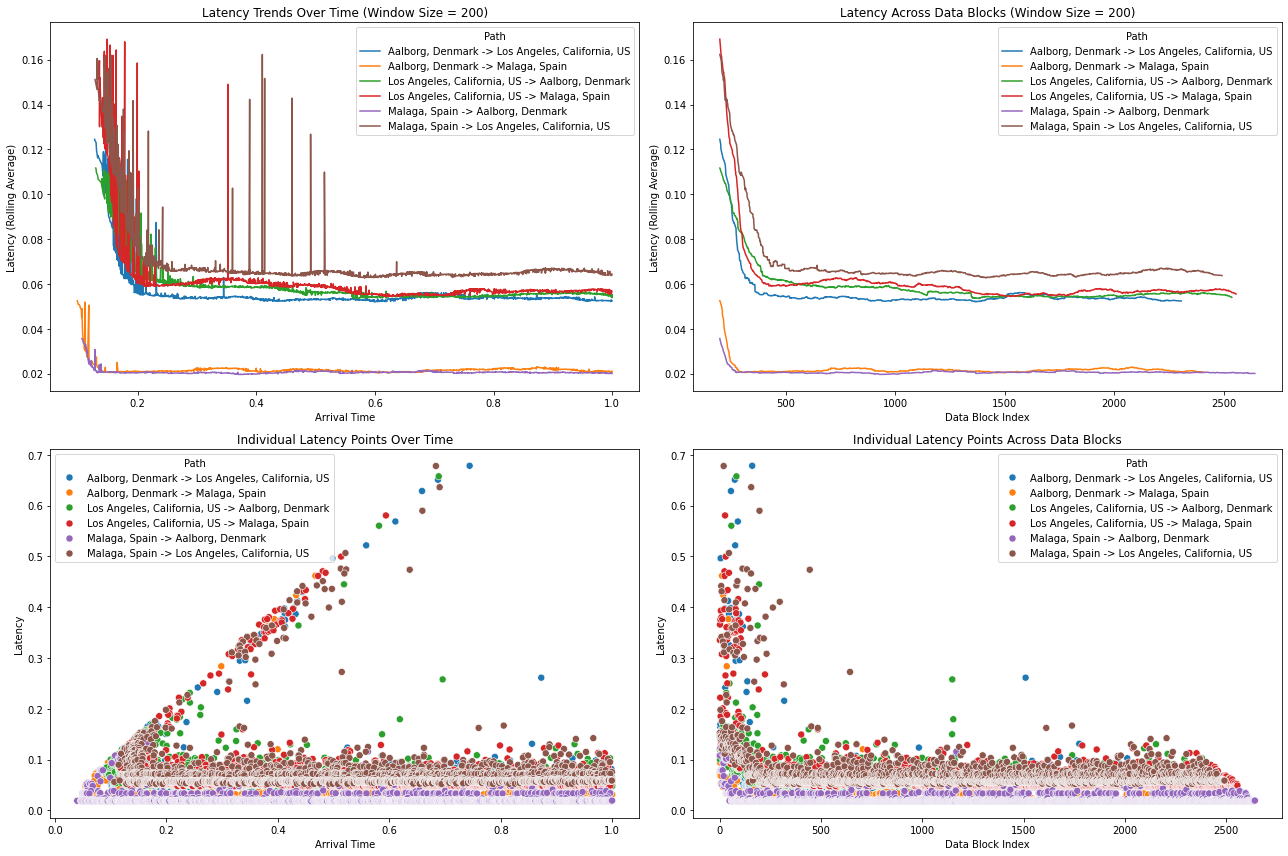

In [11]:
# Read the newly uploaded CSV file into a raw DataFrame
df_raw = pd.read_csv('./allLatencies_3gateways.csv')

# Extract the data block index from the Block ID in the raw DataFrame
df_raw['Block Index'] = df_raw['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200)
